In [4]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [5]:
# Load data
file_path = 'Desktop/Apple project/archive/applerevenue .xlsx' 
data = pd.read_excel(file_path)

# Display the first few rows and the column names
print(data.head())
print(data.columns)


        date    open    high     low   close     volume  profit or not
0 1980-12-12  0.1003  0.1007  0.1003  0.1003  469033600              0
1 1980-12-15  0.0955  0.0955  0.0951  0.0951  175884800              1
2 1980-12-16  0.0885  0.0885  0.0881  0.0881  105728000              1
3 1980-12-17  0.0902  0.0907  0.0902  0.0902   86441600              0
4 1980-12-18  0.0929  0.0933  0.0929  0.0929   73449600              0
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'profit or not'], dtype='object')


In [6]:
# Prepare features and target
features = data[['open', 'high', 'low', 'volume']]
target = data['close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')


Training set shape: (8447, 4)
Testing set shape: (2112, 4)


In [7]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
model = RandomForestRegressor(random_state=42)


In [11]:
# Set up GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_features': ['sqrt', 'log2', None]  # Corrected parameter grid
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_features': None, 'n_estimators': 200}


In [9]:
# Retrieve best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Evaluate the model with best parameters
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with Best Parameters: {mse}')


Best Parameters: {'max_features': 'sqrt', 'n_estimators': 200}
Mean Squared Error with Best Parameters: 0.13867596094956833


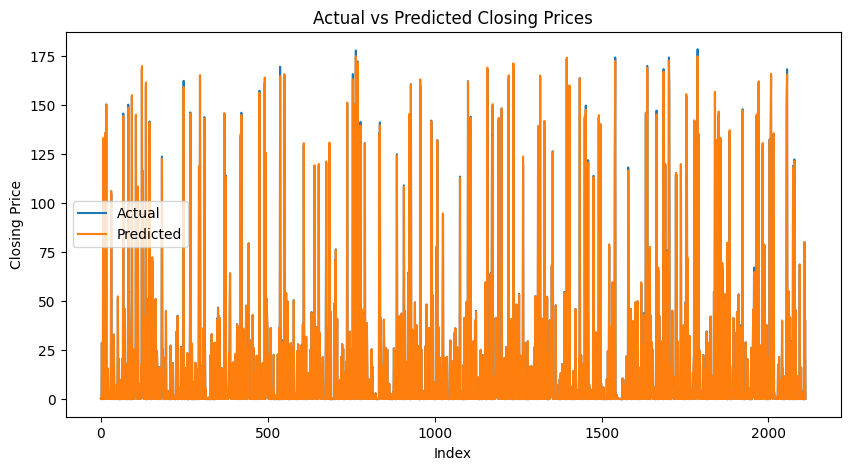

In [10]:
 # Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.show()


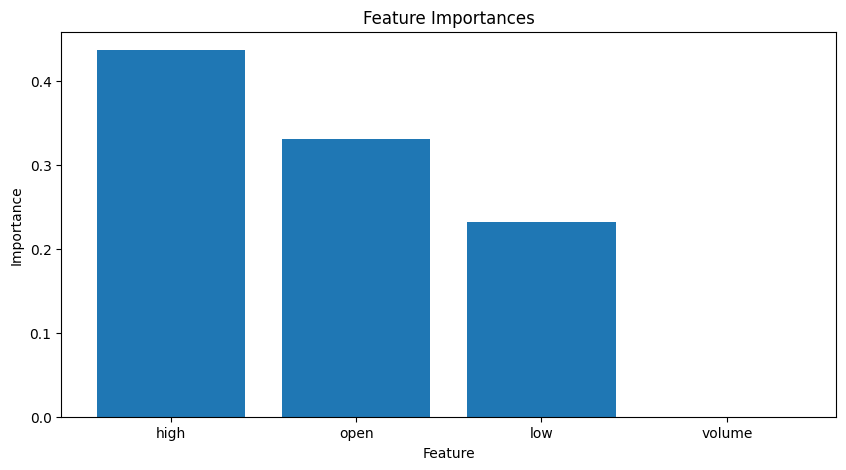

In [12]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


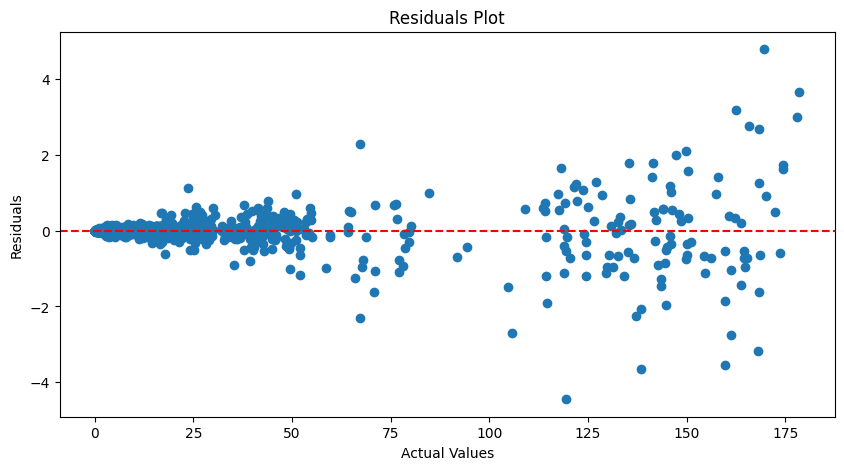

In [13]:
# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()



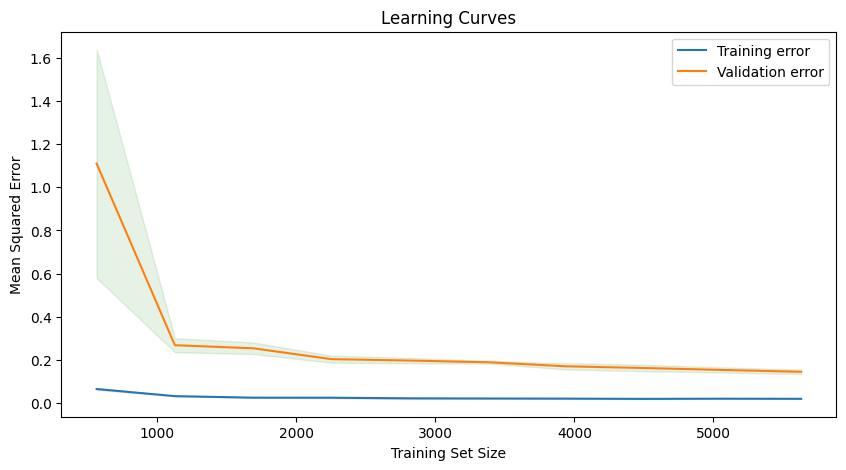

In [31]:
import numpy as np  
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate mean and standard deviation of train and test scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'{model_name} Mean Squared Error: {mse}')


RandomForest Mean Squared Error: 0.13706653623536047
GradientBoosting Mean Squared Error: 0.20033038734098815
XGBoost Mean Squared Error: 0.5207233134471309
